In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=10000,suppress=True)

In [2]:
# Import Data
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df_t = df
df_t = pd.get_dummies(df_t,drop_first=True)
df_t.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [27]:
df_t.shape

(918, 16)

In [5]:
df_t.duplicated().sum()

0

In [6]:
df_t.isna().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [7]:
df = df_t
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.188453,0.221133,0.050109,0.601307,0.193900,0.404139,0.501089,0.430283
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.391287,0.415236,0.218289,0.489896,0.395567,0.490992,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.var()

Age                     88.974254
RestingBP              342.773903
Cholesterol          11964.891079
FastingBS                0.178968
MaxHR                  648.228614
Oldpeak                  1.137572
HeartDisease             0.247420
Sex_M                    0.166220
ChestPainType_ATA        0.153105
ChestPainType_NAP        0.172421
ChestPainType_TA         0.047650
RestingECG_Normal        0.239998
RestingECG_ST            0.156473
ExerciseAngina_Y         0.241073
ST_Slope_Flat            0.250271
ST_Slope_Up              0.245407
dtype: float64

<AxesSubplot:>

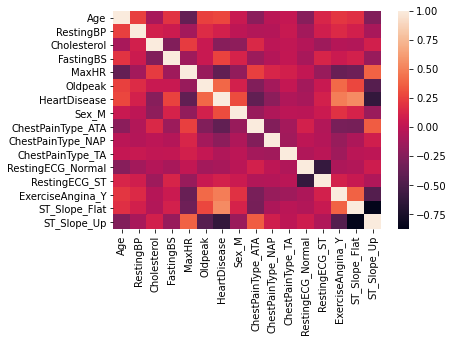

In [10]:
import seaborn as sns

sns.heatmap(df.corr(),annot=False)

In [11]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [12]:
df.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                  uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_Y       uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object

In [13]:
X = df.drop('HeartDisease',axis=1)
y = df.HeartDisease

In [14]:
## Split the data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [15]:
## Standarazation


from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

In [16]:
def confu_matrix_plot(conf_matrix):    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Prédictions', fontsize=18)
    plt.ylabel('Réel', fontsize=18)
    plt.title('Matrice de confusion', fontsize=18)
    plt.show()

In [28]:
## Model

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier


algos = {
    'RFC': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'DCT': DecisionTreeClassifier(),
    'LGR': LogisticRegression(),
    'MLP': MLPClassifier()

}

parameters = {
    'RFC': {'n_estimators': range(20,60,3),'random_state':[42]},
    'KNN': {'n_neighbors': [i for i in range(1,20,1)],'weights': ['uniform','distance'],'metric':['euclidean','manhattan']},
    'DCT': {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'random_state':[42] },
    'LGR': {'C': np.logspace(-5, 8, 15), 'penalty': ['l1', 'l2']},
    'MLP': {'solver': ['lbfgs', 'sgd', 'adam'],'activation' : ['identity', 'logistic', 'tanh', 'relu'],'alpha': 10.0 ** -np.arange(1, 10),'hidden_layer_sizes':[(40,20), (20,10)],'random_state':[42]},
}

In [30]:
for key,algo in algos.items():
    param = parameters[key]
    gscv_algo = GridSearchCV(algo, param, cv=5,n_jobs=-1)
    gscv_algo.fit(X_train_s,y_train)
    
    print(gscv_algo.best_params_)
    print(gscv_algo.best_estimator_)
    accuracy = gscv_algo.best_score_ *100
    print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
    print("=====================================")

{'n_estimators': 53, 'random_state': 42}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=53,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Accuracy for our training dataset with tuning is : 85.51%
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')
Accuracy for our training dataset with tuning is : 86.91%
{'max_leaf_nodes': 20, 'min_samples_split': 

{'n_estimators': 53, 'random_state': 42}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=53,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       112
           1       0.89      0.88      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276

Accuracy for our training dataset with tuning is : 85.51%


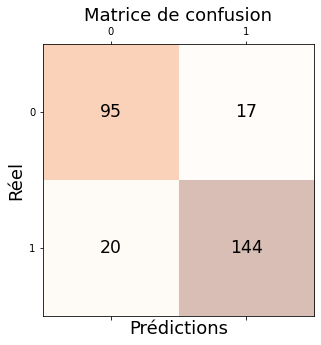

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')


              precision    recall  f1-score   support

           0       0.86      0.91      0.89       112
           1       0.94      0.90      0.92       164

    accuracy                           0.91       276
   macro avg       0.90      0.91      0.90       276
weighted avg       0.91      0.91      0.91       276

Accuracy for our training dataset with tuning is : 86.91%


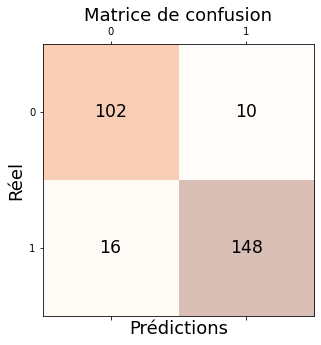

{'max_leaf_nodes': 20, 'min_samples_split': 2, 'random_state': 42}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


              precision    recall  f1-score   support

           0       0.77      0.85      0.81       112
           1       0.89      0.82      0.85       164

    accuracy                           0.83       276
   macro avg       0.83      0.84      0.83       276
weighted avg       0.84      0.83      0.83       276

Accuracy for our training dataset with tuning is : 83.79%


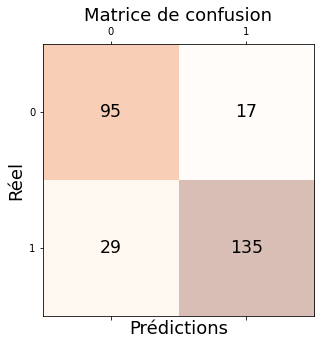

{'C': 0.006105402296585327, 'penalty': 'l2'}
LogisticRegression(C=0.006105402296585327, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Accuracy for our training dataset with tuning is : 85.51%


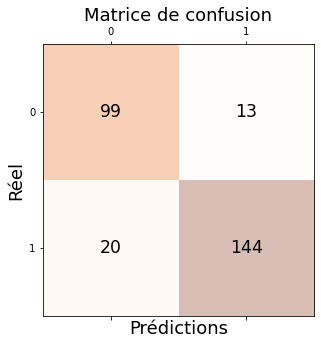

{'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (20, 10), 'random_state': 42, 'solver': 'sgd'}
MLPClassifier(activation='identity', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


              precision    recall  f1-score   support

           0       0.82      0.90      0.86       112
           1       0.93      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Accuracy for our training dataset w

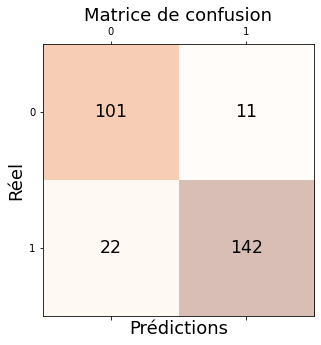

In [33]:
for key,algo in algos.items():
    param = parameters[key]
    gscv_cls = GridSearchCV(algo, param, cv=5,n_jobs=-1)
    gscv_cls.fit(X_train_s,y_train)
    
    print(gscv_cls.best_params_)
    print(gscv_cls.best_estimator_)
    print("\n")
    accuracy = gscv_cls.best_score_ *100
    y_pred = gscv_cls.predict(X_test_s)
    print(classification_report(y_test,y_pred))
    print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
    confu_matrix_plot(confusion_matrix(y_test, y_pred))
    print("=====================================")

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       112
           1       0.92      0.90      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.90      0.89      0.90       276



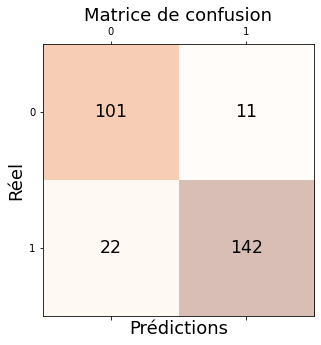

In [20]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=11)
knn = knn.fit(X_train_s,y_train)
y_pred_last = knn.predict(X_test_s)
print(classification_report(y_test,y_pred_last))
confu_matrix_plot(confusion_matrix(y_test, y_pred))

In [21]:
## Test

df_test = pd.read_csv('Test_heart.csv')
df_test = pd.get_dummies(df_test,drop_first=True)

df.var()

Age                     88.974254
RestingBP              342.773903
Cholesterol          11964.891079
FastingBS                0.178968
MaxHR                  648.228614
Oldpeak                  1.137572
HeartDisease             0.247420
Sex_M                    0.166220
ChestPainType_ATA        0.153105
ChestPainType_NAP        0.172421
ChestPainType_TA         0.047650
RestingECG_Normal        0.239998
RestingECG_ST            0.156473
ExerciseAngina_Y         0.241073
ST_Slope_Flat            0.250271
ST_Slope_Up              0.245407
dtype: float64

In [22]:
df_test.shape

(100, 16)

<AxesSubplot:>

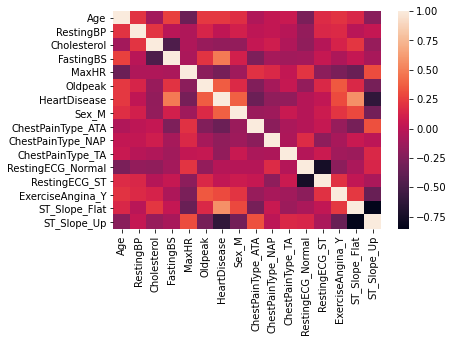

In [23]:
sns.heatmap(df_test.corr(),annot=False)

In [24]:
X2 = df_test.drop('HeartDisease',axis=1)
y2 = df_test.HeartDisease

X_test_ts = ss.transform(X2)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        36
           1       0.97      0.92      0.94        64

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



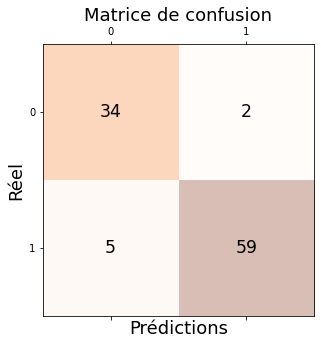

In [25]:
y_pred_test = knn.predict(X_test_ts)
print(classification_report(y_pred_test,y2))
confu_matrix_plot(confusion_matrix(y_pred_test, y2))